In [11]:
%reset -f
import numpy as np
from landlab import RasterModelGrid
from landlab.components.overland_flow import OverlandFlow
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
colors = [(0,0,1,i) for i in np.linspace(0,1,3)]
cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=10)

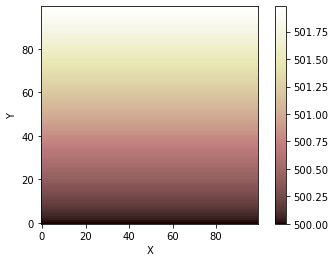

In [12]:
#Define grid
nX = 100
nY = 100
spacing = 1.0
grid = RasterModelGrid((nX, nY), xy_spacing=1.)

## Topography ##
Datum = 500 
z = np.ones(nX*nY) * Datum
z = grid.add_field('topographic__elevation', z, at='node')

# Long. slope
Long_Slope = 1./50
z += grid.node_y*Long_Slope
imshow_grid(grid,'topographic__elevation')

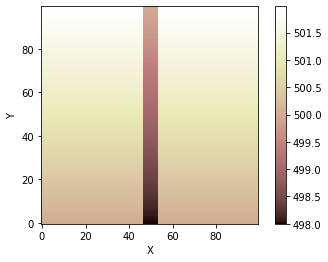

In [13]:
# Channel Indentation
Channel_Width = 8.
Channel_Depth = 2.

bools = (grid.node_x > nX/2 - Channel_Width/2) * (grid.node_x < nX/2 + Channel_Width/2)
z[bools] -= Channel_Depth
imshow_grid(grid,'topographic__elevation')

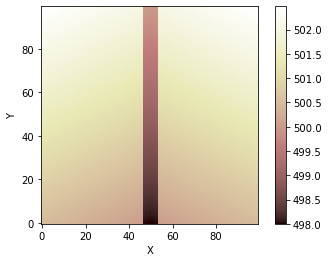

In [14]:
# Banks Slope
Transversal_Slope = 1./100

z += np.abs(grid.node_x-(nX/2))*Transversal_Slope
imshow_grid(grid,'topographic__elevation')

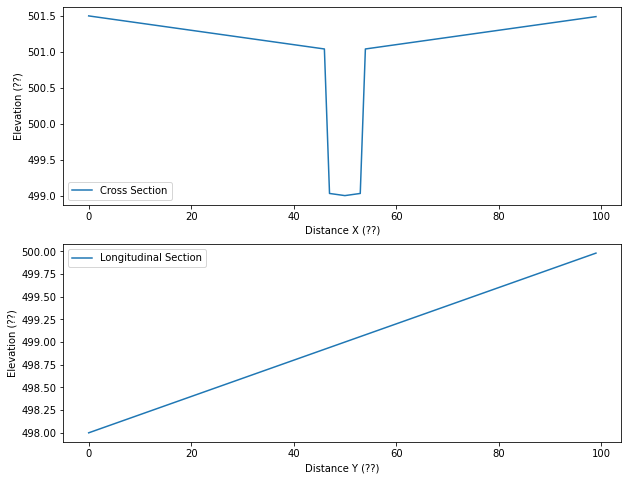

In [15]:
fig = plt.figure(figsize=(10,8))

## Cross Section
ax1 = plt.subplot(2,1,1)
ax1.plot(grid.node_x[grid.node_y==nY/2],z[grid.node_y==nY/2],label="Cross Section")
ax1.set_ylabel("Elevation (??)")
ax1.set_xlabel("Distance X (??)")
ax1.legend()

## Long Section
ax2 = plt.subplot(2,1,2)
ax2.plot(grid.node_y[grid.node_x==nX/2],z[grid.node_x==nX/2],label="Longitudinal Section")
ax2.set_ylabel("Elevation (??)")
ax2.set_xlabel("Distance Y (??)")
ax2.legend()

fig.show()

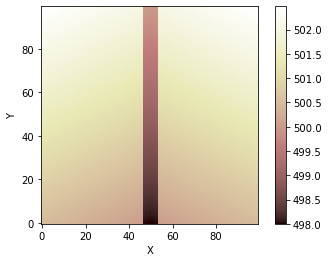

In [16]:
imshow_grid(grid,'topographic__elevation')

In [17]:
#Cast water depth values
#Pointer to water depth
h = np.zeros(100*100)
bools = (grid.node_y > 95) * (grid.node_x < 5)
h[bools] = 2
h = grid.add_field('surface_water__depth', h, at='node')

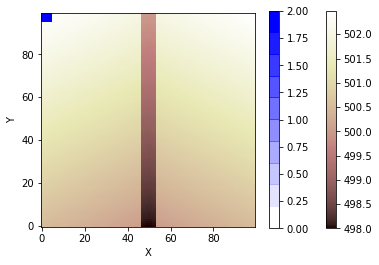

In [18]:
imshow_grid(grid,'topographic__elevation')
imshow_grid(grid,'surface_water__depth',cmap=cmap)

In [19]:
#Call overland flow model
of = OverlandFlow(grid, steep_slopes=True)
of.run_one_step()

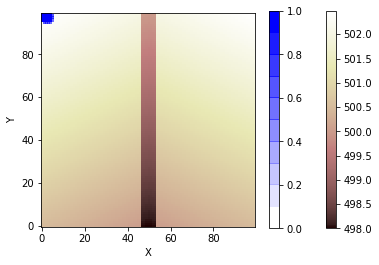

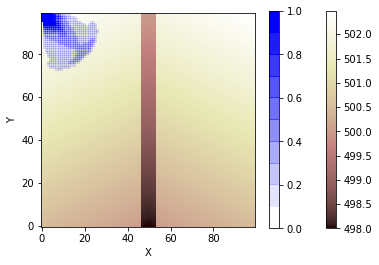

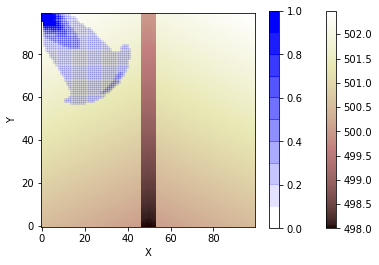

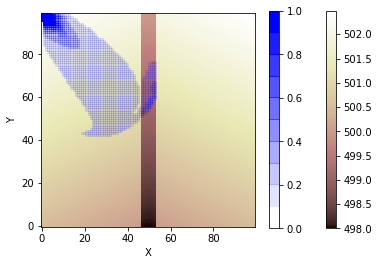

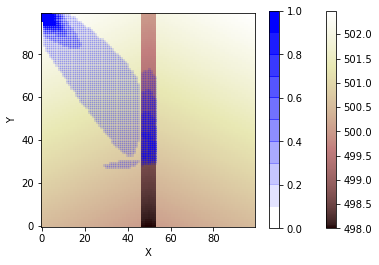

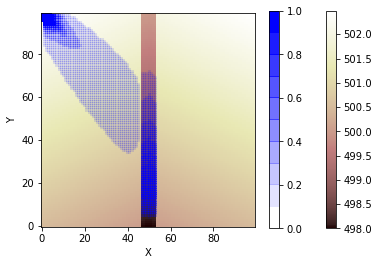

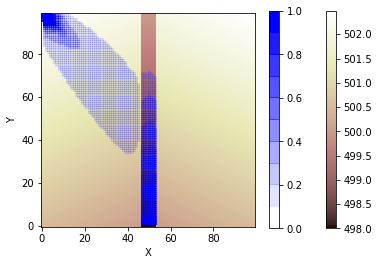

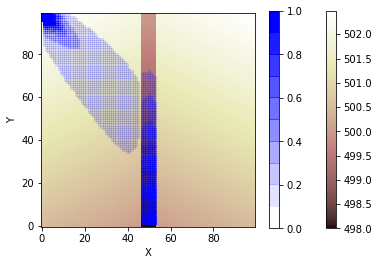

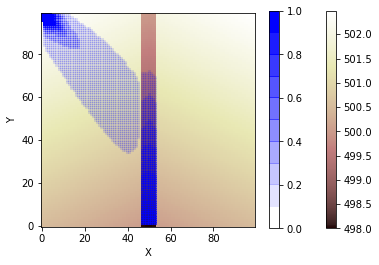

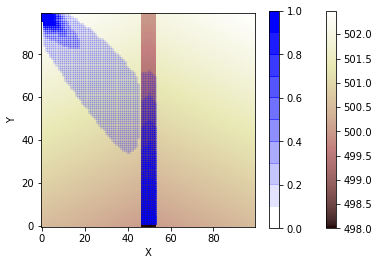

In [20]:
for i in range(1000):
    of.run_one_step()
    
    if i%100==0:
        imshow_grid(grid,'topographic__elevation')
        imshow_grid(grid,'surface_water__depth',limits=(0,1),cmap=cmap)
        plt.show()